In [1]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
# Uncommented here, because it runs only on Copilot
# sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

In [3]:
# Load the data
# data = pd.read_csv('../output/preprocessed.csv')

In [4]:
# Uncommented here, because it runs only on Copilot
# data['sentiment'] = sentiment_task(data['text'].tolist())

In [5]:
# data['sentiment_label'] = data['sentiment'].apply(lambda x: x['label'])
# data['sentiment_score'] = data['sentiment'].apply(lambda x: x['score'])
# data = data.drop(columns=['sentiment'])

In [6]:
# Load the data from colab
data = pd.read_csv('../output/sentiment.csv')

In [7]:
# Display the first few rows of the dataframe to verify the results
data[['text', 'sentiment_label', 'sentiment_score']].head()

,text,sentiment_label,sentiment_score
0,run business mean juggle countless administrat...,positive,0.655303
1,liz truss walk linger shadow predecessor charl...,negative,0.725633
2,uk brace war government building london raise ...,neutral,0.797733
3,marry second cousin remove taboo think genetic...,neutral,0.586321
4,truly disgraceful indian national congress sto...,negative,0.930906


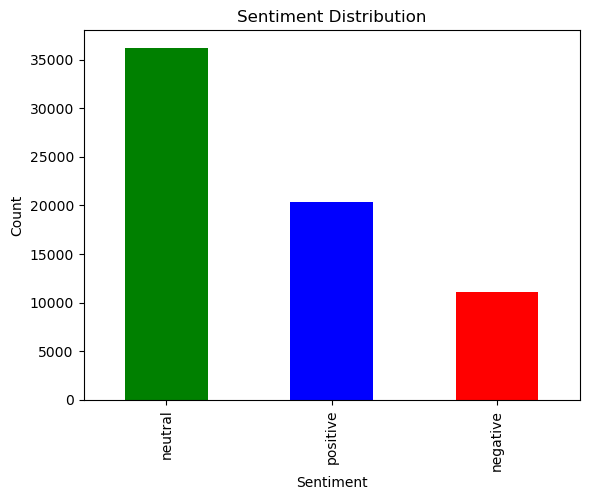

In [8]:
# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment_label'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

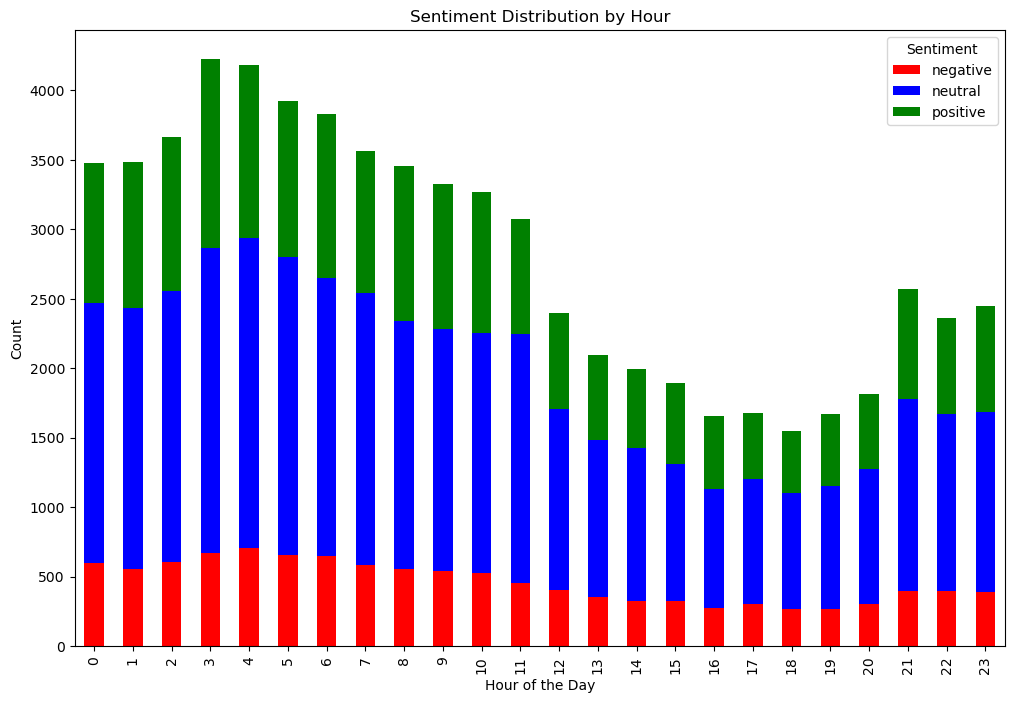

In [9]:
# Convert the timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S')

# Extract the hour from the timestamp
data['hour'] = data['timestamp'].dt.hour

# Group by hour and sentiment label, then count the occurrences
hourly_sentiment = data.groupby(['hour', 'sentiment_label']).size().unstack(fill_value=0)

# Plot the sentiment distribution by hour
hourly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue', 'green'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Hour')
plt.legend(title='Sentiment')
plt.show()

In [10]:
# Filter the negative posts
negative_posts = data[data['sentiment_label'] == 'negative']

# Sort by sentiment score in descending order
top_negative_posts = negative_posts.sort_values(by='sentiment_score', ascending=False).head(50)

pd.set_option('display.max_colwidth', None)
top_negative_posts.text

7495                                                             frustrating customer service fall short miss phone malfunctioning chat damper thing
22656                                                            frustrating customer service fall short miss phone malfunctioning chat damper thing
35383               disappointing respect writer reduce opposition government healthcare   hate poor people   itsa simpleminded ignore valid concern
16747               disappointing respect writer reduce opposition government healthcare   hate poor people   itsa simpleminded ignore valid concern
53535                                                   whirlpool guilty terrible business practice cheap product horrible service time stop support
57718                                                   whirlpool guilty terrible business practice cheap product horrible service time stop support
3368                                                                          unbelievable thirdrate actre

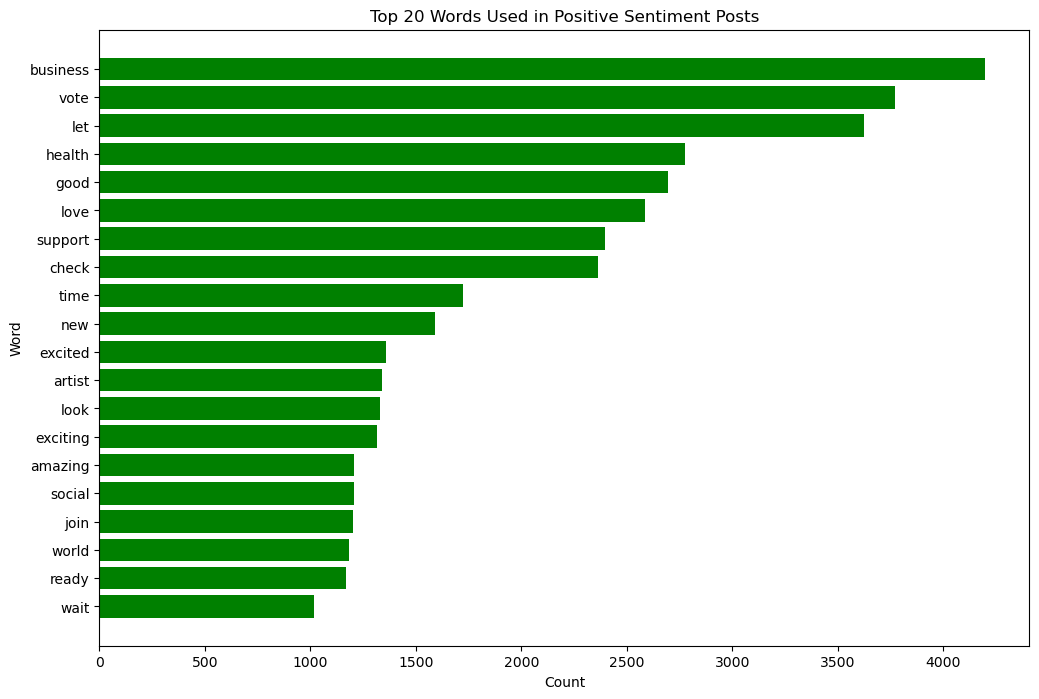

In [14]:
# Filter the positive posts
positive_posts = data[data['sentiment_label'] == 'positive']

# Combine all the text from positive posts
all_positive_text = ' '.join(positive_posts['text'].tolist())

# Tokenize the text and remove non-alphabetic characters
words = re.findall(r'\b\w+\b', all_positive_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_20_positive_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
top_20_positive_df = pd.DataFrame(top_20_positive_words, columns=['Word', 'Count'])

# Plot the top 20 words
plt.figure(figsize=(12, 8))
plt.barh(top_20_positive_df['Word'], top_20_positive_df['Count'], color='green')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Words Used in Positive Sentiment Posts')
plt.gca().invert_yaxis()
plt.show()

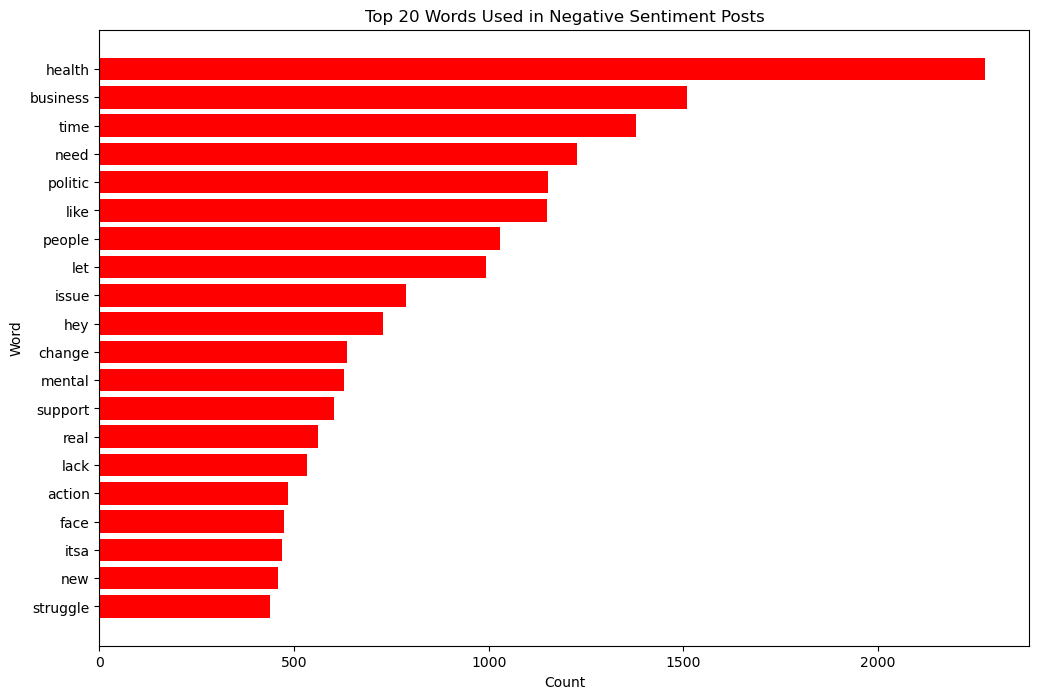

In [13]:
# Filter the positive posts
positive_posts = data[data['sentiment_label'] == 'negative']

# Combine all the text from positive posts
all_positive_text = ' '.join(positive_posts['text'].tolist())

# Tokenize the text and remove non-alphabetic characters
words = re.findall(r'\b\w+\b', all_positive_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_20_positive_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
top_20_positive_df = pd.DataFrame(top_20_positive_words, columns=['Word', 'Count'])

# Plot the top 20 words
plt.figure(figsize=(12, 8))
plt.barh(top_20_positive_df['Word'], top_20_positive_df['Count'], color='red')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Words Used in Negative Sentiment Posts')
plt.gca().invert_yaxis()
plt.show()